In [ ]:
import tensorflow_datasets as tfds

In [ ]:
ds_train = tfds.load('mnist', split = 'train', as_supervised = True)
def transform(f, l):
    return f/255, l
ds_train = ds_train.map(transform)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [ ]:
feature, _ = next(iter(ds_train.take(1)))

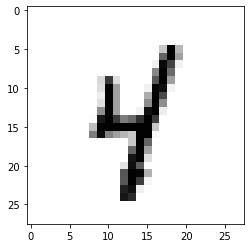

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(feature.numpy().reshape(28, 28), cmap = 'Greys')

In [ ]:
feature.numpy().ravel()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

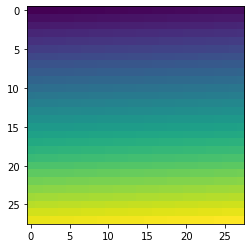

In [ ]:
import numpy as np
imagem1 = np.arange(0, 784).reshape(28, 28)
plt.imshow(imagem1)

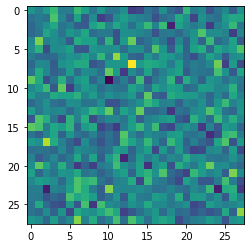

In [ ]:
np.random.seed(42)
imagem2 = np.random.normal(size = 784).reshape(28, 28)
plt.imshow(imagem2)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

tf.__version__

'2.3.0'

In [ ]:
gerador = tf.keras.Sequential([
                               tf.keras.layers.Dense(units = 128, activation = 'relu'),
                               tf.keras.layers.Dense(units = 128, activation = 'relu'),
                               tf.keras.layers.Dense(units = 784, activation = 'tanh')
                               ])

In [ ]:
ruido_teste = tf.random.uniform(shape = (1, 100), minval = -1, maxval = 1)
amostra = gerador(ruido_teste)

In [ ]:
amostra.shape

TensorShape([1, 784])

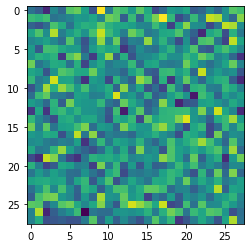

In [ ]:
plt.imshow(amostra.numpy().reshape(28, 28))

In [ ]:
discriminador = tf.keras.Sequential([
                                     tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 1)
                                     ])

In [ ]:
features, _ = next(iter(ds_train.batch(100)))
features.shape

TensorShape([100, 28, 28, 1])

In [ ]:
features = tf.reshape(features, shape = (-1, 784))
logits = discriminador(features)
logits.shape

TensorShape([100, 1])

In [ ]:
logits

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[ 0.18297854],
       [ 0.17831   ],
       [-0.3469825 ],
       [-0.12812875],
       [-0.13397396],
       [-0.23618498],
       [ 0.09759843],
       [ 0.12691945],
       [ 0.13534722],
       [-0.4226235 ],
       [-0.0135354 ],
       [-0.25346333],
       [-0.18107134],
       [ 0.21714237],
       [-0.4534733 ],
       [-0.06052256],
       [-0.2314047 ],
       [-0.1968312 ],
       [-0.21485287],
       [-0.03403728],
       [-0.23020437],
       [-0.25743145],
       [-0.30554956],
       [-0.21032165],
       [-0.1439465 ],
       [-0.16955076],
       [-0.15790623],
       [-0.24080169],
       [-0.11211802],
       [ 0.02675569],
       [ 0.00741151],
       [-0.4790987 ],
       [-0.29772994],
       [-0.07231369],
       [-0.12896499],
       [-0.1936123 ],
       [-0.03965401],
       [-0.24924143],
       [-0.2743643 ],
       [-0.32804257],
       [ 0.2552184 ],
       [-0.09693013],
       [ 0.06325644],
    

In [ ]:
tf.nn.sigmoid(logits)

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[0.5456174 ],
       [0.54445976],
       [0.41411433],
       [0.4680116 ],
       [0.46655652],
       [0.44122675],
       [0.52438027],
       [0.5316874 ],
       [0.5337852 ],
       [0.39588916],
       [0.49661618],
       [0.43697122],
       [0.45485544],
       [0.55407333],
       [0.38853523],
       [0.48487392],
       [0.44240558],
       [0.45095047],
       [0.44649243],
       [0.4914915 ],
       [0.44270173],
       [0.43599522],
       [0.4242014 ],
       [0.44761252],
       [0.4640754 ],
       [0.45771357],
       [0.4606053 ],
       [0.44008878],
       [0.4719998 ],
       [0.50668854],
       [0.50185287],
       [0.38246498],
       [0.42611253],
       [0.48192948],
       [0.4678034 ],
       [0.45174757],
       [0.49008784],
       [0.43801022],
       [0.431836  ],
       [0.418717  ],
       [0.56346047],
       [0.47578645],
       [0.5158088 ],
       [0.46212298],
       [0.5258022 ],
     

In [ ]:
batch_size = 100
amostras_teste = []
treinamento_discriminador = tf.keras.optimizers.Adam(learning_rate = 0.001)
treinamento_gerador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(300):
    erro_gerador_batch = 0.
    erro_discriminador_batch = 0.
    n_batches = 0
    for X_batch, _ in ds_train.batch(batch_size):
        n_batches += 1

        imagens_reais = tf.reshape(X_batch * 2 - 1, shape = (batch_size, -1))
        batch_ruido = tf.random.uniform(shape = (batch_size, 100), minval = -1, maxval = 1)
        
        with tf.GradientTape() as tape_gerador, tf.GradientTape() as tape_discriminador:
            imagens_ruido = gerador(batch_ruido)

            logits_imagens_reais = discriminador(imagens_reais)
            logits_imagens_ruido = discriminador(imagens_ruido)

            erro_gerador = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.ones_like(logits_imagens_ruido), 
                                                                                  logits = logits_imagens_ruido))
        
            erro_discriminador_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.ones_like(logits_imagens_reais) * 0.9,
                                                                                             logits = logits_imagens_reais))
            erro_discriminador_ruido = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.zeros_like(logits_imagens_ruido),
                                                                                              logits = logits_imagens_ruido))
            erro_discriminador = erro_discriminador_real + erro_discriminador_ruido
        
        gradients = tape_gerador.gradient(erro_gerador, gerador.trainable_variables)
        treinamento_gerador.apply_gradients(zip(gradients, gerador.trainable_variables))
        
        gradients = tape_discriminador.gradient(erro_discriminador, discriminador.trainable_variables)
        treinamento_discriminador.apply_gradients(zip(gradients, discriminador.trainable_variables))

        erro_gerador_batch += erro_gerador.numpy()
        erro_discriminador_batch += erro_discriminador.numpy()
    
    erro_gerador_batch /= n_batches
    erro_discriminador_batch /= n_batches
    print('época: ' + str(epoca + 1) + ' erro D: ' + str(erro_discriminador_batch) + ' erro G: ' + str(erro_gerador_batch))

    # No final de cada época, gerar uma imagem com o gerador treinado
    ruido_teste = tf.random.uniform(shape = (1, 100), minval = -1, maxval = 1)
    imagem_gerada = gerador(ruido_teste)
    amostras_teste.append(imagem_gerada.numpy().reshape(28, 28))

época: 1 erro D: 0.4435781961182753 erro G: 3.903004496643941
época: 2 erro D: 0.7600197279453278 erro G: 3.1241982306043306
época: 3 erro D: 1.0067487432062625 erro G: 3.0993166851003964
época: 4 erro D: 1.3605766388277212 erro G: 3.065726202776035
época: 5 erro D: 1.2109773096938927 erro G: 1.7718100726107757
época: 6 erro D: 1.1424798826376596 erro G: 2.815305021802584
época: 7 erro D: 1.244856627881527 erro G: 2.5789511361221473
época: 8 erro D: 1.1975254234671593 erro G: 2.9802061249812444
época: 9 erro D: 1.1979009679953256 erro G: 2.2990584454437095
época: 10 erro D: 1.5325553818543751 erro G: 2.39021484375
época: 11 erro D: 1.4695153931776683 erro G: 2.3552687303721904
época: 12 erro D: 1.226642890026172 erro G: 2.4267650320132574
época: 13 erro D: 1.228365346888701 erro G: 2.2064813500642777
época: 14 erro D: 1.1835838001966477 erro G: 2.6085344099005066
época: 15 erro D: 1.2139100510875385 erro G: 1.832996453344822
época: 16 erro D: 1.108693154056867 erro G: 1.951982675095399

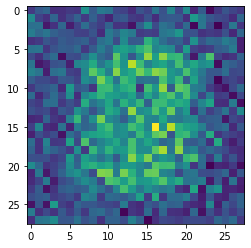

In [ ]:
plt.imshow(amostras_teste[0].reshape(28, 28))

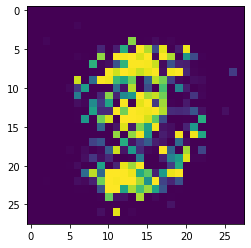

In [ ]:
plt.imshow(amostras_teste[100].reshape(28, 28))

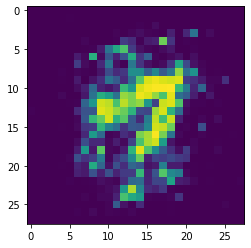

In [ ]:
plt.imshow(amostras_teste[200].reshape(28, 28))

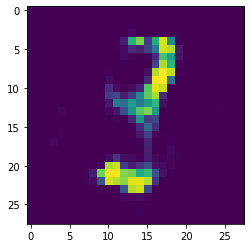

In [ ]:
plt.imshow(amostras_teste[-1].reshape(28, 28))